# Generación de observaciones aleatorias a partir de una distribución de probabilidad

La primera etapa de la simulación es la **generación de números aleatorios**. Los números aleatorios sirven como el bloque de construcción de la simulación. La segunda etapa de la simulación es la **generación de variables aleatorias basadas en números aleatorios**. Esto incluye generar variables aleatorias <font color ='red'> discretas y continuas de distribuciones conocidas </font>. En esta clase, estudiaremos técnicas para generar variables aleatorias.

Intetaremos dar respuesta a el siguiente interrogante:
>Dada una secuencia de números aleatorios, ¿cómo se puede generar una secuencia de observaciones aleatorias a partir de una distribución de probabilidad dada? Varios enfoques diferentes están disponibles, dependiendo de la naturaleza de la distribución

Considerando la generación de números alestorios estudiados previamente, asumiremos que tenemos disponble una secuencia $U_1,U_2,\cdots$ variables aleatorias independientes, para las cuales se satisface que:
$$
P(U_i\leq u) = \begin{cases}0,& u<0\\ u,&0\leq u \leq 1\\ 1,& u>1 \end{cases}
$$
es decir, cada variable se distribuye uniformemente entre 0 y 1.

**Recordar:** En clases pasadas, observamos como transformar un número p-seudoaletorio distribuido uniformemte entre 0 y 1, en una distribución normalmente distribuida con media $(\mu,\sigma^2)\longrightarrow$ <font color='red'> Médoto de Box Muller </font> como un caso particular.

En esta sesión, se presentarán dos de los técnicas más ampliamente utilizados para generar variables aletorias, a partir de una distribución de probabilidad.

## 1. Método de la transformada inversa

Este método puede ser usado en ocasiones para generar una observación aleatoria. Tomando $X$ como la variable aletoria involucrada, denotaremos la función de distribución de probabilidad acumulada por
$$F(x)=P(X\leq x),\quad \forall x$$
<font color ='blue'> Dibujar graficamente esta situación en el tablero</font>

El método de la transformada inversa establece
$$X = F^{-1}(U),\quad U \sim \text{Uniforme[0,1]}$$
donde $F^{-1}$ es la transformada inversa de $F$.

Recordar que $F^{-1}$ está bien definida si $F$ es estrictamente creciente, de otro modo necesitamos una regla para solucionar los casos donde esta situación no se satisface. Por ejemplo, podríamos tomar
$$F^{-1}(u)=\inf\{x:F(x)\geq u\}$$ 
Si hay muchos valores de $x$ para los cuales $F(x)=u$, esta regla escoje el valor mas pequeño. Observar esta situación en el siguiente ejemplo:

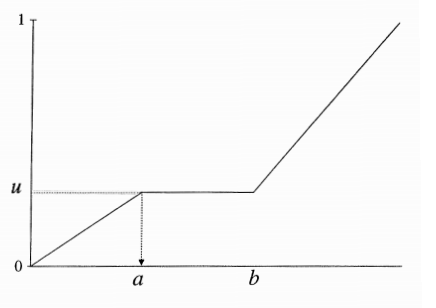
Observe que en el intervalo $(a,b]$ si $X$ tiene distribución $F$, entonces
$$P(a<X\leq b)=F(b)-F(a)=0\longrightarrow \text{secciones planas}$$

Por lo tanto si $F$ tienen una densidad continua, entonces $F$ es estrictamente creciente y su inversa está bien definida. 


Ahora observemos cuando se tienen las siguientes funciones:
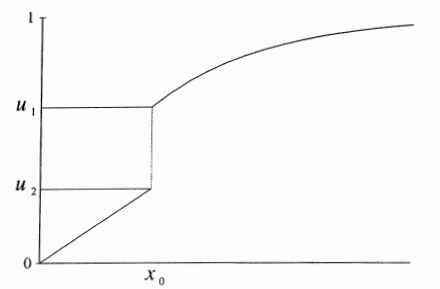
Observemos que sucede en $x_0$
$$\lim_{x \to x_0^-} F(x)\equiv F(x^-)<F(x^+)\equiv \lim_{x\to x_0^+}F(x)$$
Bajo esta distribución el resultado $x_0$ tiene probabilidad $F(x^+)-F(x^-)$. Por otro lado todos los valores de $u$ entre $[u_2,u_1]$ serán mapeados a $x_0$.

Los siguientes ejemplos mostrarán una implementación directa de este método.

### Ejemplo 1: Distribución exponencial
La distribución exponencial con media $\theta$ tiene distribución 
$$F(x)=1-e^{-x/\theta}, \quad x\geq 0$$
> Distrubución exponencial python: https://en.wikipedia.org/wiki/Exponential_distribution

In [4]:
# Creamos la función que crea muestras distribuidas exponencialmente
def D_exponential(theta,N):
    return -np.log(np.random.random(N))*theta

3.99781205625


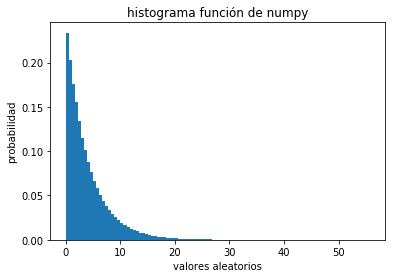

In [5]:
import numpy as np
import matplotlib.pyplot as plt
theta = 4 # Media
N = 10**6 # Número de muestras
# creamos muestras exponenciales con la función que esta en numpy
x = np.random.exponential(theta,N) 
# creamos muestras exponenciales con la función creada
x2 = D_exponential(theta,N)
# Graficamos el historial para x
plt.hist(x,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función de numpy')
print(np.mean(x))
plt.show()

4.0045616193


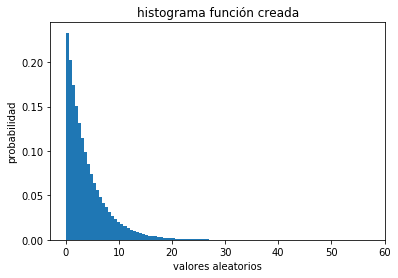

In [7]:
plt.hist(x2,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función creada')
print(np.mean(x2))
plt.show()

### Ejemplo 2
Se sabe que la distribución Erlang resulta de la suma de $k$ variables distribuidas exponencialmente cada una con media $\theta$, y por lo tanto esta variable resultante tiene distribución Erlang de tamaño $k$ y media $theta$.

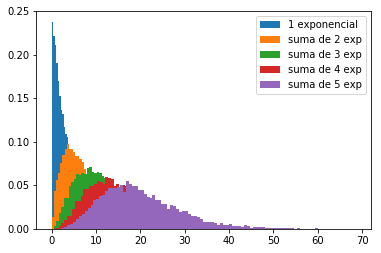

In [71]:
N = 10**4
# Variables exponenciales
x1 = np.random.exponential(4,N)
x2 = np.random.exponential(4,N)
x3 = np.random.exponential(4,N)
x4 = np.random.exponential(4,N)
x5 = np.random.exponential(4,N)

# Variables erlang
e0 = np.random.exponential(4,N)
e1 = (x1+x2)
e2 = (x3+x4+x5)
e3 = (x1+x2+x3+x4)
e4 = x1+x2+x3+x4+x5
plt.hist(e0,100,normed=True,label='1 exponencial')
plt.hist(e1,100,normed=True,label='suma de 2 exp')
plt.hist(e2,100,normed=True,label='suma de 3 exp')
plt.hist(e3,100,normed=True,label='suma de 4 exp')
plt.hist(e4,100,normed=True,label='suma de 5 exp')
plt.legend()

plt.show()

In [100]:
# Función para crear variables aleatorias Erlang
def D_erlang(theta,k,N):
    y = [] 
    f = np.random.rand(N,k)  # Matriz de variables aleatorias de dim N*k mejora la velocidad del algoritmo
    for i in range(N):
        y.append(-(theta)*np.log(np.prod(f[i,:])))
    return y

### Función de densidad variables Erlang

$$p(x)=x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}$$

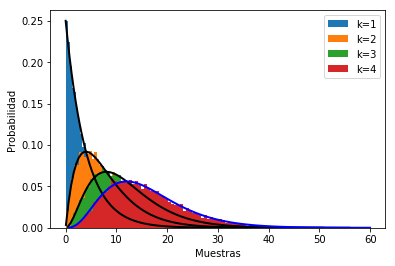

In [116]:
theta = 4    # media 
plt.figure(1)
y = D_erlang(theta,1,N)
y2 = D_erlang(theta,2,N)
y3 = D_erlang(theta,3,N)
y4 = D_erlang(theta,4,N)

####################### historial y
count, bins, ignored = plt.hist(y,100,normed=True,label='k=1')
k = 1  
scale = theta
y = bins**(k-1)*(np.exp(-bins/scale) /(sps.gamma(k)*scale**k))
plt.plot(bins, y, linewidth=2,color='k')
######################## historial y2
count, bins, ignored = plt.hist(y2,100,normed=True,label='k=2')
k = 2  
scale = theta
y = bins**(k-1)*(np.exp(-bins/scale) /(sps.gamma(k)*scale**k))
plt.plot(bins, y, linewidth=2,color='k')
######################## historial y3
count, bins, ignored = plt.hist(y3,100,normed=True,label='k=3')
k = 3  
scale = theta
y = bins**(k-1)*(np.exp(-bins/scale) /(sps.gamma(k)*scale**k))
plt.plot(bins, y, linewidth=2,color='k')
######################## historial y4
count, bins, ignored = plt.hist(y4,100,normed=True,label='k=4')
k = 4
scale = theta
y = bins**(k-1)*(np.exp(-bins/scale) /(sps.gamma(k)*scale**k))
plt.plot(bins, y, linewidth=2,color='b')

plt.ylabel('Probabilidad')
plt.xlabel('Muestras')
plt.legend()
plt.show()

### Ejemplo 3 <font color ='red'> **Tarea** </font>
El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$

### Ejemplo 4
Distribución de Rayleigh
$$F(x)=1-e^{-2x(x-b)},\quad x\geq b $$

In [14]:
def D_rayleigh(b,N):
    return (b/2)+np.sqrt(b**2-2*np.log(np.random.rand(N)))/2

def D_rayleigh2(sigma,N):
    return np.sqrt(-2*sigma**2*np.log(np.random.rand(N)))

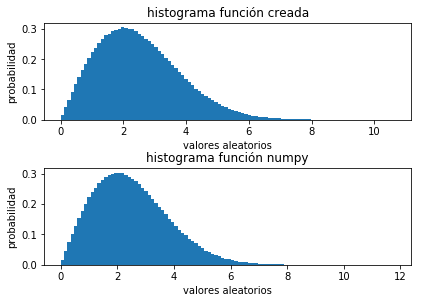

In [15]:
b = .1; N =10**6;sigma = 2
r = D_rayleigh(b,N)
r2 = np.random.rayleigh(sigma,N)
r3 = D_rayleigh2(sigma,N)

plt.subplot(211)
plt.hist(r3,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función creada')

plt.subplot(212)
plt.hist(r2,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función numpy')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)
plt.show()

## Distribuciones discretas

Para una variable dicreta, evaluar $F^{-1}$ se reduce a buscar en una tabla. Considere por ejemplo una variable aleatoria discreta, cuyos posibles valores son $c_1<c_2<\cdots<c_n$. Tome $p_i$ la probabilidad alcanzada por $c_i$, $i=1,\cdots,n$ y tome $q_0=0$, en donde $q_i$ representa las **probabilidades acumuladas asociadas con $c_i$** y está definido como:
$$q_i=\sum_{j=1}^{i}p_j,\quad i=1,\cdots,n \longrightarrow q_i=F(c_i)$$
Entonces, para tomar muestras de esta distribución se deben de realizar los siguientes pasos:
   1. Generar un número uniforme $U$ entre (0,1).
   2. Encontrar $k\in\{1,\cdots,n\}$ tal que $q_{k-1}<U\leq q_k$
   3. Tomar $X=c_k$.

### Ejemplo numérico

In [2]:
import pandas as pd

In [49]:
val    = [1,2,3,4,5]
p_ocur = [.1,.2,.4,.2,.1]
p_acum = np.cumsum(p_ocur)

df = pd.DataFrame(index=val,columns=['Probabilidades','Probabilidad acumulada'], dtype='float')
df.index.name = "Valores (índices)"
df.loc[val,'Probabilidades'] = p_ocur
df.loc[val,'Probabilidad acumulada'] = p_acum
df

,Probabilidades,Probabilidad acumulada
Valores (índices),,
1,0.1,0.1
2,0.2,0.3
3,0.4,0.7
4,0.2,0.9
5,0.1,1.0


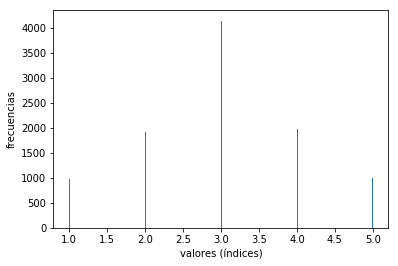

In [41]:
N = 10**4
v = []
for j in range(N):
    u =np.random.rand(1)
    v.append(sum(1 for i in p_acum if i<u)+1)
plt.hist(v,300,normed=False)
plt.xlabel('valores (índices)')
plt.ylabel('frecuencias')
plt.show()

### Ejemplo binomial: 
Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
<font color ='blue'> Mostrar en el tablero la validez de la siguiente ecuación</font>
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

In [1]:
# parámetros de la distribución
n = 10; p = 0.7
val = np.arange(0,n+1,1)

p_ocurr = [(1-p)**n]
c = p/(1-p)
for i in range(1,n+1):
    p_ocurr.append((c*(n-i)/(i+1))*p_ocurr[-1])
    p_acum = p_acum + p_ocurr[-1]*
p_acum = np.cumsum(p_ocurr)
print(np.size(p_acum))
print(np.size(p_ocurr))
df = pd.DataFrame(index=val,columns=['Probabilidades','Probabilidad acumulada'], dtype='float')
df.index.name = "Valores (índices)"
df.loc[val,'Probabilidades'] = p_ocurr
df.loc[val,'Probabilidad acumulada'] = p_acum
df


SyntaxError: invalid syntax (<ipython-input-1-284c4076ce36>, line 9)

In [23]:
N = 10**8
f = lambda x:x**2
l = []
# for i in range(N):
#     l.append(f(np.random.rand(1)))
c = f(np.random.rand(N))
print(np.mean(c))

0.333325870722
